#  Capstone project Accident Data

## Introduction:
Road accidents are an unstoppable problem in our life and societies. Death on the road is a big puzzle in the current world. According to the World Health Organization(WHO), an estimated 1.35 million deaths worldwide were related to road traffic injuries in 2016 [1] .The death rate  has remained constant, compared to the world's population. Every 25 seconds, one person died in road accidents. In  2016, 34,436 motor vehicle crashes were recorded in the USA and 37,461 people died with an average of 102 per day [2].
In this work, I will try to find out the way to reduce the number of road accidents, by developing a machine learning model to predict the severity of accidents. When the road visibility and weather conditions are changing this model will alert the car user. 


## Business Understanding: 

The local government of Seattle is trying to implement some method to alert the car user, police , traffic system and health system about critical situations to reduce the death and injuries on the road.
The final capstone project in the IBM certificate course, we want to analyze the accident “severity” in terms of human fatality, traffic delay, property damage, or any other type of accident bad impact. The data was collected by Seattle SPOT Traffic Management Division and provided by Coursera via a link. This dataset is updated weekly and is from 2004 to present. It contains information such as severity code, address type, location, collision type, weather, road condition, speeding, among others.
The target audience of the project is local Seattle government, police, rescue groups, and last but not least, car insurance institutes. The model and its results are going to provide some advice for the target audience to make insightful decisions for reducing the number of accidents and injuries for the city.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

# Downloading Dataset

In [2]:
! wget https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-14 14:18:19--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638   712KB/s   in 80s    

2020-09-14 14:19:39 (906 KB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



## Load Data

In [3]:
collission_df = pd.read_csv('Data-Collisions.csv')
collission_df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
#Dataframe Details Info
collission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [5]:
#shape of DataFrame
collission_df.shape

(194673, 38)

## Data Understanding:

The dataset we select has 194,673 rows and 37 different independent variables.We will use SEVERITY CODE as your dependent variable Y, with different independent variables X to identify the cause of road accidents and level of severity.The dataset are quite large, we need to filter out the missing value and delete the unrelated columns. Then we select the independent variables such as address type, weather, road condition, and light condition to compare with Y which may have more impact on the accidents.The dependent variable, “SEVERITYCODE”, contains numbers that correspond to different levels of severity caused by an accident .
The code that corresponds to the severity of the collision:
- 3—fatality
- 2b—serious injury
- 2—injury
- 1—prop damage
- 0—unknown


- Other important variables include:
- ADDRTYPE: Collision address type: Alley, Block, Intersection
- LOCATION: Description of the general location of the collision
- PERSONCOUNT: The total number of people involved in the collision helps identify severity involved
- PEDCOUNT: The number of pedestrians involved in the collision helps identify severity involved
- PEDCYLCOUNT: The number of bicycles involved in the collision helps identify severity involved
- VEHCOUNT: The number of vehicles involved in the collision identify severity involved
- INCDTTM : The date and time of the incident.
- JUNCTIONTYPE: Category of junction at which collision took place helps identify where most collisions occur
- WEATHER: A description of the weather conditions during the time of the collision
- ROADCOND: The condition of the road during the collision
- LIGHTCOND: The light conditions during the collision
- SPEEDING: Whether or not speeding was a factor in the collision (Y/N)
- SEGLANEKEY: A key for the lane segment in which the collision occurred
- CROSSWALKKEY: A key for the crosswalk at which the collision occurred
- HITPARKEDCAR: Whether or not the collision involved hitting a parked car


Furthermore, because of the existence of null values in some records, the data needs to be preprocessed before any further processing.


# Cleaning the Data Set

### Convert incident date to Year Month Day of Week

In [6]:
collission_df['INCDATE']=collission_df['INCDATE'].str[:10]

collission_df[['YEAR', 'MONTH','DAY']]=collission_df["INCDATE"].str.split("/", expand=True)

collission_df['INCDATE'] = pd.to_datetime(collission_df['INCDATE'])

collission_df['DAYOFWEEK'] = collission_df['INCDATE'].dt.dayofweek

## Drop the unnecessary columns

In [7]:
# Make a list of column to drop that won't be useful
drop_col_list = ['X','Y','OBJECTID','INCKEY','COLDETKEY','REPORTNO','STATUS','INTKEY','EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYCODE.1','SDOT_COLDESC','SPEEDING','INATTENTIONIND','INCDTTM','PEDROWNOTGRNT','SDOTCOLNUM','ST_COLDESC','INCDATE','DAY']
collission_df = collission_df.drop(labels =drop_col_list, axis= 1)
collission_df.head()

,SEVERITYCODE,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,...,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,YEAR,MONTH,DAYOFWEEK
0,2,Intersection,5TH AVE NE AND NE 103RD ST,Injury Collision,Angles,2,0,0,2,At Intersection (intersection related),...,Overcast,Wet,Daylight,10,0,0,N,2013,03,2
1,1,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),...,Raining,Wet,Dark - Street Lights On,11,0,0,N,2006,12,2
2,1,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,Parked Car,4,0,0,3,Mid-Block (not related to intersection),...,Overcast,Dry,Daylight,32,0,0,N,2004,11,3
3,1,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,Property Damage Only Collision,Other,3,0,0,3,Mid-Block (not related to intersection),...,Clear,Dry,Daylight,23,0,0,N,2013,03,4
4,2,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,Angles,2,0,0,2,At Intersection (intersection related),...,Raining,Wet,Daylight,10,0,0,N,2004,01,2


### The graph show the number of person effected per year by car accident 

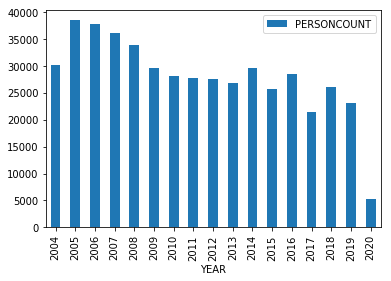

In [8]:
collission_df[['YEAR', 'PERSONCOUNT']].groupby('YEAR').sum().plot(kind='bar')

### The graph show the number of person effected per Month by car accident 

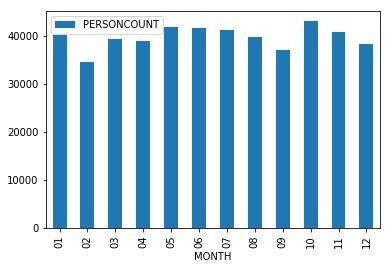

In [9]:
collission_df[['MONTH', 'PERSONCOUNT']].groupby('MONTH').sum().plot(kind='bar')

### The graph show the number of person effected per Week day by car accident  
Here days are 
- 0  #Monday
- 1  #Tuesday
- 2  #Wednesday
- 3  #Thursday
- 4  #Friday
- 5  #Saturday
- 6  #Sunday

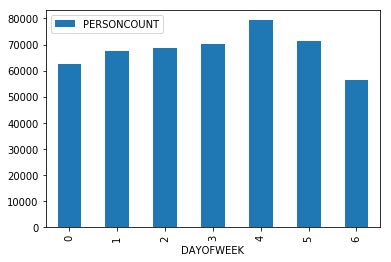

In [10]:
collission_df[['DAYOFWEEK', 'PERSONCOUNT']].groupby('DAYOFWEEK').sum().plot(kind='bar')

In [11]:
collission_df.groupby('SEVERITYCODE').sum()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SEGLANEKEY,CROSSWALKKEY,DAYOFWEEK
SEVERITYCODE,,,,,,,,
1,317921,719,679,265233,1777110,5956749,207489439,403703
2,157943,6511,4848,108691,922570,46488374,1696889835,168388


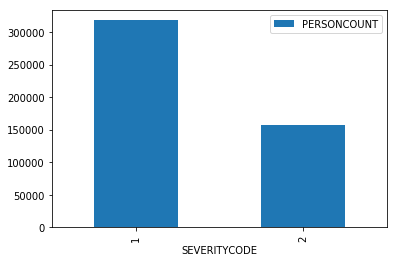

In [12]:
collission_df[['SEVERITYCODE','PERSONCOUNT']].groupby('SEVERITYCODE').sum().plot(kind='bar')

### Convert Categorical features to numerical value

In [13]:
#Replace addtype to numric 
collission_df['ADDRTYPE'].replace(to_replace=['Block','Intersection', 'Alley'], value=[1, 2, 3],inplace=True)

#Weather clear condition is nearly 60% for both severity codes. The options also include unknown and other which cannot be analyzed
#Therefore, I normalize the data to good weather (clear - 1), nothing to do with weather (unknown & other - 0), bad weather (the rest -2)
collission_df['WEATHER'].replace(to_replace=['Clear', 'Raining', 'Overcast', 'Unknown', 'Fog/Smog/Smoke', 'Snowing', 'Other', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt', 'Severe Crosswind', 'Partly Cloudy'], value=[1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2],inplace=True)
collission_df['HITPARKEDCAR'].replace(to_replace=['N', 'Y'], value=[0, 1], inplace=True)


collission_df['SEVERITYDESC'].replace(to_replace=['Property Damage Only Collision', 'Injury Collision'], value=[1, 2], inplace=True)
collission_df['COLLISIONTYPE'].replace(to_replace=['Parked Car', 'Angles', 'Rear Ended', 'Other', 'Sideswipe', 'Left Turn', 'Right Turn', 'Head On', 'Pedestrian', 'Cycles'], value=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], inplace=True) 


collission_df['JUNCTIONTYPE'].replace(to_replace=['At Intersection (intersection related)', 'Mid-Block (not related to intersection)','Mid-Block (but intersection related)','Driveway Junction', 'At Intersection (but not related to intersection)', 'Ramp Junction', 'Unknown'], value=[1, 2, 3, 4, 5, 6, 7], inplace=True)



collission_df['ROADCOND'].replace(to_replace=['Dry','Wet', 'Unknown', 'Ice', 'Snow/Slush'
                                    'Other', 'Standing Water', 'Sand/Mud/Dirt',
                                    'Oil'], value=[1, 2, 3, 4, 5, 6, 7, 8],
                        inplace=True)
collission_df['ROADCOND'] = pd.to_numeric(collission_df.ROADCOND, errors='coerce')

collission_df['LIGHTCOND'].replace(to_replace=['Daylight', 'Dark - Street Lights On', 'Unknown',
                                     'Dusk', 'Dawn', 'Dark - No Street Lights', 
                                     'Dark - Street Lights Off', 'Other', 'Dark - Unknown Lighting'],
                         value=[1, 2, 3, 4, 5, 6, 7, 8, 9], inplace=True)

collission_df['ST_COLCODE'] = pd.to_numeric(collission_df.ST_COLCODE, errors='coerce')
collission_df['SDOT_COLCODE'] = pd.to_numeric(collission_df.ST_COLCODE, errors='coerce')

In [14]:
#Drop NAN rows
collission_df=collission_df.dropna(subset = ['WEATHER','ROADCOND','LIGHTCOND','COLLISIONTYPE','LOCATION','JUNCTIONTYPE','ADDRTYPE'])  

In [15]:
collission_df.head()

,SEVERITYCODE,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,...,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,YEAR,MONTH,DAYOFWEEK
0,2,2.0,5TH AVE NE AND NE 103RD ST,2,2.0,2,0,0,2,1.0,...,2.0,2.0,1.0,10.0,0,0,0,2013,03,2
1,1,1.0,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,1,5.0,2,0,0,2,2.0,...,2.0,2.0,2.0,11.0,0,0,0,2006,12,2
2,1,1.0,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,1,1.0,4,0,0,3,2.0,...,2.0,1.0,1.0,32.0,0,0,0,2004,11,3
3,1,1.0,2ND AVE BETWEEN MARION ST AND MADISON ST,1,4.0,3,0,0,3,2.0,...,1.0,1.0,1.0,23.0,0,0,0,2013,03,4
4,2,2.0,SWIFT AVE S AND SWIFT AV OFF RP,2,2.0,2,0,0,2,1.0,...,2.0,2.0,1.0,10.0,0,0,0,2004,01,2


In [15]:
collission_df.isna().sum()/len(collission_df)

SEVERITYCODE     0.0
ADDRTYPE         0.0
LOCATION         0.0
SEVERITYDESC     0.0
COLLISIONTYPE    0.0
PERSONCOUNT      0.0
PEDCOUNT         0.0
PEDCYLCOUNT      0.0
VEHCOUNT         0.0
JUNCTIONTYPE     0.0
SDOT_COLCODE     0.0
UNDERINFL        0.0
WEATHER          0.0
ROADCOND         0.0
LIGHTCOND        0.0
ST_COLCODE       0.0
SEGLANEKEY       0.0
CROSSWALKKEY     0.0
HITPARKEDCAR     0.0
YEAR             0.0
MONTH            0.0
DAYOFWEEK        0.0
dtype: float64

In [16]:
#we use a simple statistical technique to balance the target feature "SEVERITYCODE".
collission_df['SEVERITYCODE'].value_counts()

1    125171
2     56389
Name: SEVERITYCODE, dtype: int64

In [17]:
#the value of 1 is almost three times bigger than the value of 2. It is possible to solve the issue by downsampling the class 1
from sklearn.utils import resample
collission_df_max = collission_df[collission_df.SEVERITYCODE ==1]
collission_df_min = collission_df[collission_df.SEVERITYCODE ==2]
collission_df_max_ds = resample(collission_df_max, 
                               replace = False,
                               n_samples= 56389,
                               random_state = 123
                              )

collission_df_balance = pd.concat([collission_df_max_ds,collission_df_min])
collission_df_balance.SEVERITYCODE.value_counts()

2    56389
1    56389
Name: SEVERITYCODE, dtype: int64

In [18]:
collission_df['WEATHER'].value_counts()

1.0    108766
2.0     60568
0.0     12226
Name: WEATHER, dtype: int64

In [19]:
collission_df['ROADCOND'].value_counts()

1.0    122002
2.0     46671
3.0     11479
4.0      1176
6.0       108
7.0        64
8.0        60
Name: ROADCOND, dtype: int64

In [20]:
collission_df['LIGHTCOND'].value_counts()

1.0    113306
2.0     47028
3.0     10277
4.0      5744
5.0      2420
6.0      1432
7.0      1142
8.0       200
9.0        11
Name: LIGHTCOND, dtype: int64

In [21]:
collission_df['ADDRTYPE'].value_counts()

1.0    118484
2.0     63076
Name: ADDRTYPE, dtype: int64

In [22]:
collission_df['COLLISIONTYPE'].value_counts()

1.0     42534
2.0     34339
3.0     33522
4.0     22619
5.0     18239
6.0     13607
9.0      6470
10.0     5352
7.0      2919
8.0      1959
Name: COLLISIONTYPE, dtype: int64

In [23]:
collission_df['JUNCTIONTYPE'].value_counts()

2.0    85731
1.0    60997
3.0    22208
4.0    10418
5.0     2042
6.0      159
7.0        5
Name: JUNCTIONTYPE, dtype: int64

In [24]:
collission_df['PEDCOUNT'].value_counts()

0    174762
1      6545
2       225
3        22
4         4
6         1
5         1
Name: PEDCOUNT, dtype: int64

In [25]:
collission_df['PEDCYLCOUNT'].value_counts()

0    176155
1      5364
2        41
Name: PEDCYLCOUNT, dtype: int64

## Define Feature data set for X

In [26]:
ft_df = collission_df_balance[['WEATHER','ROADCOND','LIGHTCOND','ADDRTYPE','COLLISIONTYPE','JUNCTIONTYPE','PEDCOUNT','PEDCYLCOUNT']]
X = ft_df
X[0:5]

,WEATHER,ROADCOND,LIGHTCOND,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,PEDCOUNT,PEDCYLCOUNT
23477,2.0,1.0,2.0,2.0,6.0,1.0,0,0
130631,1.0,1.0,1.0,1.0,3.0,3.0,0,0
96633,2.0,1.0,1.0,2.0,2.0,1.0,0,0
52708,2.0,2.0,1.0,1.0,3.0,3.0,0,0
77256,1.0,1.0,1.0,1.0,4.0,2.0,0,0


In [27]:
y = collission_df_balance['SEVERITYCODE'].values
y[0:5]

array([1, 1, 1, 1, 1])

# Train-Test Split

In [28]:
#import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (78944, 8) (78944,)
Test set: (33834, 8) (33834,)


## Normalize Data

In [29]:
from sklearn import preprocessing

X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


array([[ 1.27810966, -0.60527457,  0.40887665,  1.26726358,  0.91293987,
        -0.99036607, -0.23932877, -0.21512352],
       [-0.5149324 , -0.60527457, -0.56135692, -0.78910182, -0.2855368 ,
         1.20731221, -0.23932877, -0.21512352],
       [ 1.27810966, -0.60527457, -0.56135692,  1.26726358, -0.68502902,
        -0.99036607, -0.23932877, -0.21512352],
       [ 1.27810966,  0.95756382, -0.56135692, -0.78910182, -0.2855368 ,
         1.20731221, -0.23932877, -0.21512352],
       [-0.5149324 , -0.60527457, -0.56135692, -0.78910182,  0.11395542,
         0.10847307, -0.23932877, -0.21512352]])

# KNN
## K nearest neighbor

In [30]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 2, 1, 2, 2])

In [31]:
from sklearn import metrics
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.61328841, 0.60285512, 0.62366259, 0.6001064 , 0.63217474,
       0.64340604, 0.65502158, 0.65008571, 0.67101141, 0.6558787 ,
       0.66045989, 0.65912987, 0.66811491, 0.66034167])

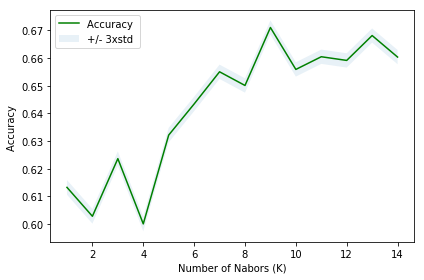

The best accuracy was with 0.6710114086421942 with k= 9


In [32]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

## model with K = 9

In [33]:
k = 9
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 2, 2, 2, 2])

## KNN Model Evaluation 

In [34]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

In [35]:
#Predict y
knn_yhat = neigh.predict(X_test)

# jaccard
knn_jaccard = jaccard_similarity_score(y_test, knn_yhat)
print("KNN Jaccard index: ", knn_jaccard)


# f1_score
knn_f1_score = f1_score(y_test, knn_yhat, average='weighted')
print("KNN F1-score: ", knn_f1_score)

KNN Jaccard index:  0.6710114086421942
KNN F1-score:  0.670738826660399


## Decision Tree

In [36]:
# import library DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# create DecisionTreeClassifier as named d_tree
d_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)
#train
d_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [37]:
dt_yhat = d_tree.predict(X_test)
dt_yhat

array([1, 2, 2, ..., 1, 2, 1])

### Decision tree evaluation

In [38]:
# jaccard
dt_jaccard = jaccard_similarity_score(y_test, dt_yhat)
print("DT Jaccard index: ", dt_jaccard)

# f1_score
dt_f1_score = f1_score(y_test, dt_yhat, average='weighted')
print("DT F1-score: ", dt_f1_score)


DT Jaccard index:  0.6980847668026245
DT F1-score:  0.6970328787447123


## Support Vector Machine

In [39]:
# import SVM library
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [40]:
svm_yhat = clf.predict(X_test)
svm_yhat

array([1, 2, 2, ..., 1, 2, 1])

### SVM evaluation

In [41]:
# jaccard
svm_jaccard = jaccard_similarity_score(y_test, svm_yhat)
print("SVM Jaccard index: ", svm_jaccard)

# f1_score
svm_f1_score = f1_score(y_test, svm_yhat, average='weighted')
print("SVM F1-score: ", svm_f1_score)


SVM Jaccard index:  0.6956611692380446
SVM F1-score:  0.6930330013606999


## Logistic Regression

In [42]:
#import Library LogisticRegression
from sklearn.linear_model import LogisticRegression

#Train
lr = LogisticRegression(C=6, solver='liblinear').fit(X_train,y_train)
lr


LogisticRegression(C=6, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [43]:
lr_yhat = lr.predict(X_test)
lr_yhat

array([2, 1, 2, ..., 1, 1, 1])

### Logistic regression evaluation

In [44]:
lr_yhat_prob = lr.predict_proba(X_test)

# jaccard
lr_jaccard = jaccard_similarity_score(y_test, lr_yhat)
print("LR Jaccard: ", lr_jaccard)

# f1_score
lr_f1_score = f1_score(y_test, lr_yhat, average='weighted')
print("LR F1-score: ", lr_f1_score)

# logloss
lr_logloss = log_loss(y_test, lr_yhat_prob)
print("LR log loss: ", lr_logloss)


LR Jaccard:  0.6304013714015487
LR F1-score:  0.6285955849476118
LR log loss:  0.6142731759680288


## Report
The accuracy of the built model using different evaluation metrics:

In [45]:
# create a jaccard list
jaccard_score = [knn_jaccard,dt_jaccard,svm_jaccard,lr_jaccard]

# create a f1-score list
f1_score = [knn_f1_score,dt_f1_score,svm_f1_score, lr_f1_score]

# create a Log_Loss list
log_los = ['NA','NA','NA',lr_logloss]
# fomulate the report format
df_report = pd.DataFrame(jaccard_score, index=['KNN','Decision Tree','SVM','Logistic Regression'])
df_report.columns = ['Jaccard']
df_report.insert(loc=1, column='F1-score', value=f1_score)
df_report.insert(loc=2, column='LogLoss', value=log_los)
df_report.columns.name = 'Algorithm'
df_report

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.671011,0.670739,NA
Decision Tree,0.698085,0.697033,NA
SVM,0.695661,0.693033,NA
Logistic Regression,0.630401,0.628596,0.614273
